# 15: Quantum-AutoEncoder

This demonstration of quantum autoencoder is based on the contents of the paper ["Development of convolution filter embedded quantum autoencoder by quantum simulator"](https://confit.atlas.jp/guide/event/jsai2019/subject/2E1-J-1-01/advanced) presented at Japanese Society for Artificial Intelligence (2019).

In [1]:
from renom_q import *
from renom_q.ml.qae import QAE

We use the adiabatic quantum computation with Ising model to perform noise removal with the auto-encoder.

 - The code of Quantum-AutoEncoder  
https://github.com/ReNom-dev-team/ReNomQ/blob/release/0.2/renom_q/ml/qae.py

Define the input image with `QAE.original(number)`. The image is a square whose side is the number specified by `number`. The minimum size is 3$\times$3 images.

In [2]:
qae = QAE()
qae.original(3)

By displaying `QAE.original_state`, it is possible to confirm the Ising spin state in the input image. Also, show the input image with `QAE.draw_image(QAE.original_state)`.

[1 1 1 1 1 1 1 1 1]


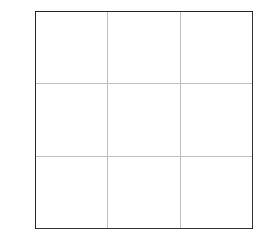

In [3]:
print(qae.original_state)
qae.draw_image(qae.original_state)

At `QAE.add_noise(noise_rate)`, noise is mixed into the input image. `noise_rate` can specify the noise rate. It will be 0.1 if not specified.

In [4]:
qae.add_noise(0.3)

By displaying `QAE.noise_state`, it is possible to confirm the Ising spin state in the noise mixed image. Also, show the noise mixed image with `QAE.draw_image(QAE.noise_state)`.

[-1 -1  1  1  1  1  1  1  1]


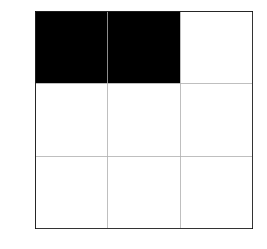

In [5]:
print(qae.noise_state)
qae.draw_image(qae.noise_state)

Denoising from the noise mixed image by `QAE.decode()`. 

In [6]:
qae.decode()

By displaying `QAE.decoded_state`, it is possible to confirm the Ising spin state in the image after denoising. Also, show the image after denoising with `QAE.draw_image(QAE.decoded_state)`.

[1 1 1 1 1 1 1 1 1]


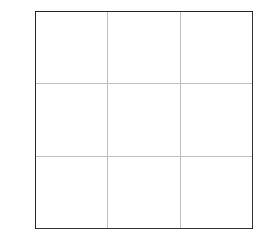

In [7]:
print(qae.decoded_state)
qae.draw_image(qae.decoded_state)

By displaying `QAE.result`, it is possible to see the calculation result and each parameter of adiabatic quantum calculation.

In [8]:
print(qae.result)

{'solution': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'result': {'011000111': 6, '011101111': 3, '100111111': 1, '101111000': 5, '101111010': 1, '101111110': 4, '101111111': 1, '111101111': 15, '111110111': 24, '111111011': 13, '111111110': 20, '111111111': 931}, 'J': array([[ 0,  1, -1, -1,  0,  0,  1,  0,  0],
       [ 1,  0, -1,  0,  1,  0,  0, -1,  0],
       [-1, -1,  0,  0,  0, -1,  0,  0, -1],
       [-1,  0,  0,  0, -1, -1, -1,  0,  0],
       [ 0,  1,  0, -1,  0, -1,  0, -1,  0],
       [ 0,  0, -1, -1, -1,  0,  0,  0,  1],
       [ 1,  0,  0, -1,  0,  0,  0, -1, -1],
       [ 0, -1,  0,  0, -1,  0, -1,  0, -1],
       [ 0,  0, -1,  0,  0,  1, -1, -1,  0]]), 'hz': array([-1, -1, -1, -1, -1, -1, -1, -1, -1]), 'hx': 1, 'shots': 1024, 'qasm': None, 'noise rate': {'q0': 0.5, 'q1': 0.5, 'q2': 0.0, 'q3': 0.0, 'q4': 0.25, 'q5': 0.25, 'q6': 0.25, 'q7': 0.0, 'q8': 0.25}}


***

It is possible to add a pattern to the input image. In addition, input image can be specified by array type (The elements of the array can be specified only 0 or 1).

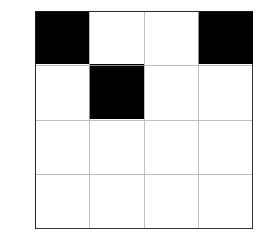

In [9]:
qae.original(4, [0, 3, 5])     #mark q0, q3 and q5
qae.draw_image(qae.original_state)

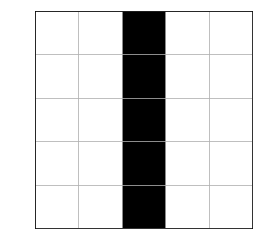

In [10]:
qae.original(5, [[0, 2], [1, 2], [2, 2], [3, 2], [4, 2]])     #Mark in the second column of each row
qae.draw_image(qae.original_state)

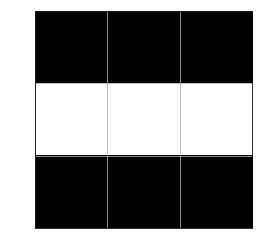

In [11]:
qae.original([[0, 0, 0], [1, 1, 1], [0, 0, 0]])     #array
qae.draw_image(qae.original_state)

Using TensorFlow backend.


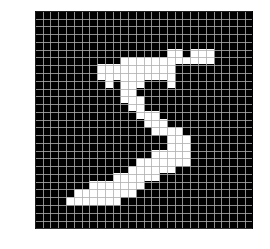

In [12]:
from keras.datasets import mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()
image = x_train[0]/255

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] >= 0.5:
            image[i, j] = 1
        else:
            image[i, j] = 0

qae.original(image)     #array
qae.draw_image(qae.original_state)

***

When drawing a quantum circuit, if you first set as `QAE(set_qasm=True)`, qasm code is added to `QAE.result`.